In [1]:
import os 
import sys 

sys.path.insert(0, '..')

In [2]:
from bio_check import Verifier
from pprint import pp

In [3]:
sbml_fp = "../model-examples/sbml-core/Elowitz-Nature-2000-Repressilator/BIOMD0000000012_url.xml"
omex_fp = sbml_fp.replace("/BIOMD0000000012_url.xml", ".omex")
report_fp = omex_fp.replace(".omex", "/reports.h5")
start = 400
end = 1000
nsteps = 600 
comparison_id = "test_notebook_sbml0"
simulators = ["copasi", "tellurium"]
selection_list = ["cI mRNA"]

In [4]:
verify = Verifier()

{'bio-check-message': 'Hello from the Verification Service API!'}


In [5]:
# inspect public methods and attributes

_dir = dir(verify)

for m in _dir:
    print(m) if not m.startswith("_") else None

data
endpoint_root
export_csv
get_compatible
get_verify_output
observables_dataframe
save_plot
select_observables
verify_omex
verify_sbml
visualize_comparison
visualize_outputs


In [6]:
# submit a new verification 

submission_1 = verify.verify_sbml(sbml_filepath=sbml_fp, comparison_id=comparison_id, start=start, end=end, steps=nsteps, simulators=['copasi', 'tellurium'])

In [7]:
submission_1

{'job_id': 'test_notebook_sbml0_3d0ed069-cd97-41b2-b580-b4239ab5ee86',
 'status': 'PENDING',
 'timestamp': '2024-08-02 18:02:30.052084',
 'comparison_id': 'test_notebook_sbml0',
 'path': 'uploads/test_notebook_sbml0_3d0ed069-cd97-41b2-b580-b4239ab5ee86/BIOMD0000000012_url.xml',
 'start': 400,
 'end': 1000,
 'steps': 600,
 'simulators': ['copasi,tellurium'],
 'include_output': True,
 'rTol': None,
 'aTol': None,
 'selection_list': None}

In [8]:
submission_2 = verify.verify_omex(omex_filepath=omex_fp, comparison_id=comparison_id, truth=report_fp)

Selection list: None


In [9]:
submission_2

{'job_id': 'utc_comparison_omex_db400783-0b1f-45e0-9a56-c16fc2a57c53',
 'status': 'PENDING',
 'timestamp': '2024-08-02 18:02:40.994345',
 'comparison_id': None,
 'path': 'uploads/utc_comparison_omex_db400783-0b1f-45e0-9a56-c16fc2a57c53/Elowitz-Nature-2000-Repressilator.omex',
 'simulators': ['amici', 'copasi', 'tellurium'],
 'ground_truth_report_path': None,
 'include_output': True,
 'rTol': None,
 'aTol': None,
 'selection_list': None}

In [10]:
# use job id generated from submission to poll gateway

sbml_job_id = "test_notebook_sbml0_3d0ed069-cd97-41b2-b580-b4239ab5ee86"
omex_job_id = 'utc_comparison_omex_db400783-0b1f-45e0-9a56-c16fc2a57c53'

sbml = verify.get_verify_output(sbml_job_id)

In [11]:
# we can call this multiple times until ready

omex = verify.get_verify_output(omex_job_id)

In [12]:
omex

{'content': {'status': 'PENDING',
  'job_id': 'utc_comparison_omex_db400783-0b1f-45e0-9a56-c16fc2a57c53',
  'path': 'uploads/utc_comparison_omex_db400783-0b1f-45e0-9a56-c16fc2a57c53/Elowitz-Nature-2000-Repressilator.omex',
  'simulators': ['amici', 'copasi', 'tellurium'],
  'timestamp': '2024-08-02 18:02:40.994345',
  'ground_truth_report_path': None,
  'include_outputs': True,
  'rTol': None,
  'aTol': None,
  'selection_list': None}}

In [15]:
# use selection list to return only one observable

selection_list = ["cI mRNA"]

submission_3 = verify.verify_sbml(sbml_filepath=sbml_fp, end=1000 - 400, number_of_steps=600, comparison_id="notebook_test_sbml_selection_list", selection_list=selection_list)

In [16]:
submission_3

{'job_id': 'notebook_test_sbml_selection_list_a819ce88-7480-435f-93c9-79c47880faec',
 'status': 'PENDING',
 'timestamp': '2024-08-02 16:58:58.318163',
 'comparison_id': None,
 'path': 'uploads/notebook_test_sbml_selection_list_a819ce88-7480-435f-93c9-79c47880faec/BIOMD0000000012_url.xml',
 'end': 600,
 'steps': 600,
 'simulators': ['copasi,tellurium'],
 'include_output': True,
 'rTol': None,
 'aTol': None,
 'selection_list': ['cI mRNA']}

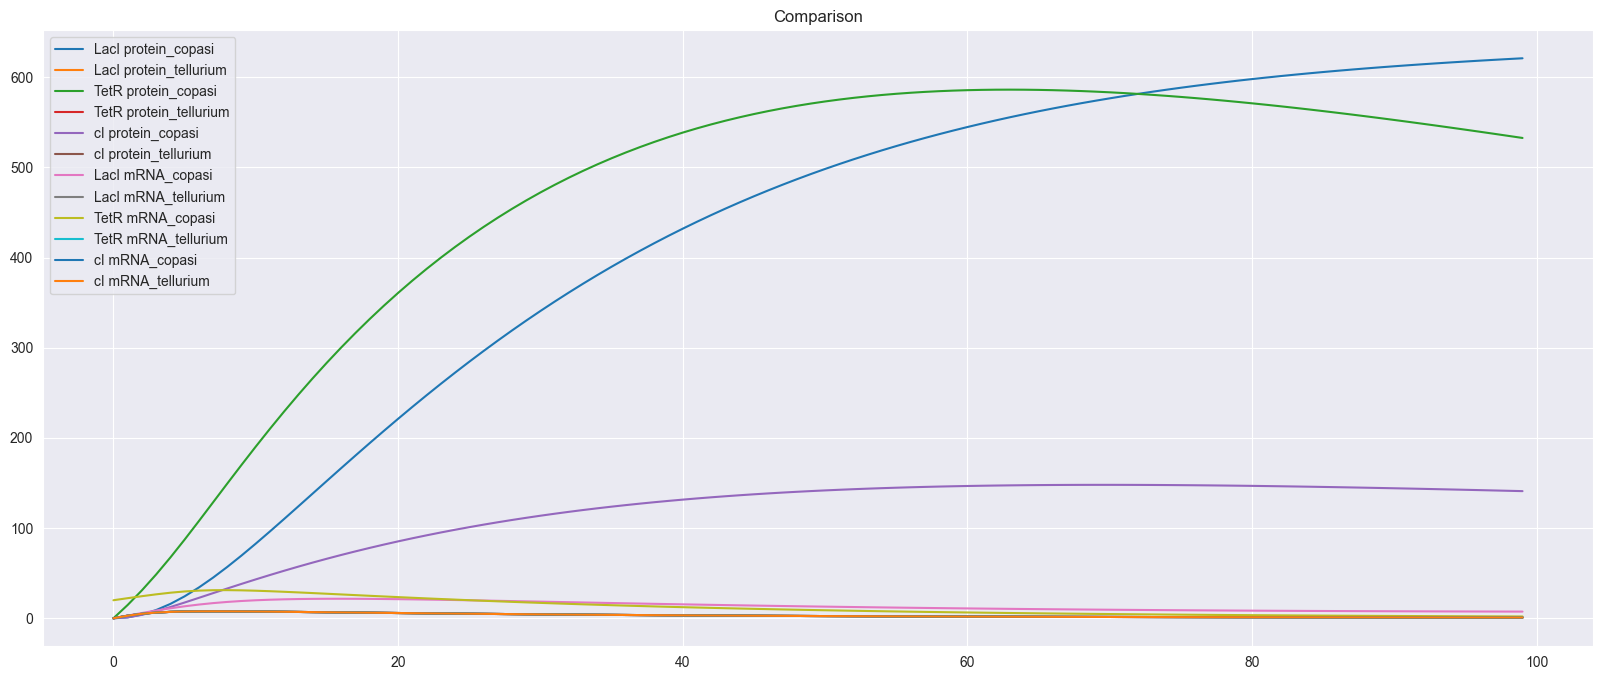

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt


def visualize(data: dict, simulators):
    """Visualize simulation output data, not comparison data!"""
    # plt.figure(figsize=(20, 8))
    spec_names = list(data['content']['results']['results'].keys())
    fig, axes = plt.subplots(nrows=len(spec_names), ncols=len(simulators), sharex=True, sharey=True)
    for species_name, species_data in data['content']['results']['results'].items():
        output_data = species_data.get('output_data')
        if output_data is not None:
            for simulator_name, simulator_output in output_data.items():
                
                sns.lineplot(data=simulator_output, label=f"{species_name}_{simulator_name}")
    
    plt.legend()
    plt.grid(True)
    plt.title("Comparison")
    return plt.show()


visualize(sbml)

In [49]:

def f(_x):
    def _f():
        x = _x.copy()
        while len(x):
            for i, n in enumerate(x):
                print(x)
                x.remove(n)
    from time import sleep
    tries = 0
    while tries < 2:
        _f()
        v = ''
        for _ in range(5):
            v += '.'
            print(v)
            sleep(0.5)
        _x.append([list(range(x)) for x in range(10)])
        tries += 1
    
    

            

In [50]:
f(_x=list(range(3)))

[0, 1, 2]
[1, 2]
[1]
.
..
...
....
.....
[0, 1, 2, [[], [0], [0, 1], [0, 1, 2], [0, 1, 2, 3], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8]]]
[1, 2, [[], [0], [0, 1], [0, 1, 2], [0, 1, 2, 3], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8]]]
[1, [[], [0], [0, 1], [0, 1, 2], [0, 1, 2, 3], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8]]]
[[[], [0], [0, 1], [0, 1, 2], [0, 1, 2, 3], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8]]]
.
..
...
....
.....


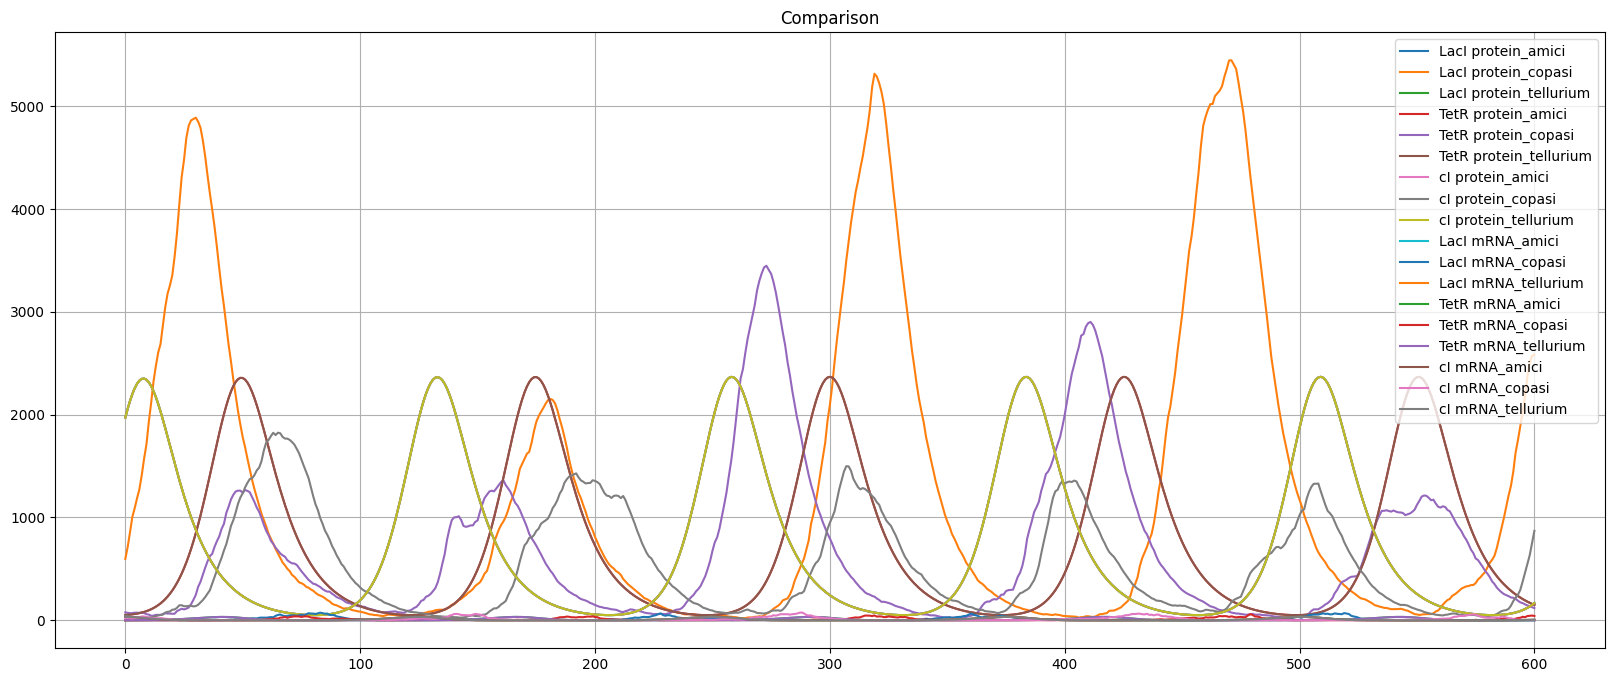

In [18]:
visualize(test_data)

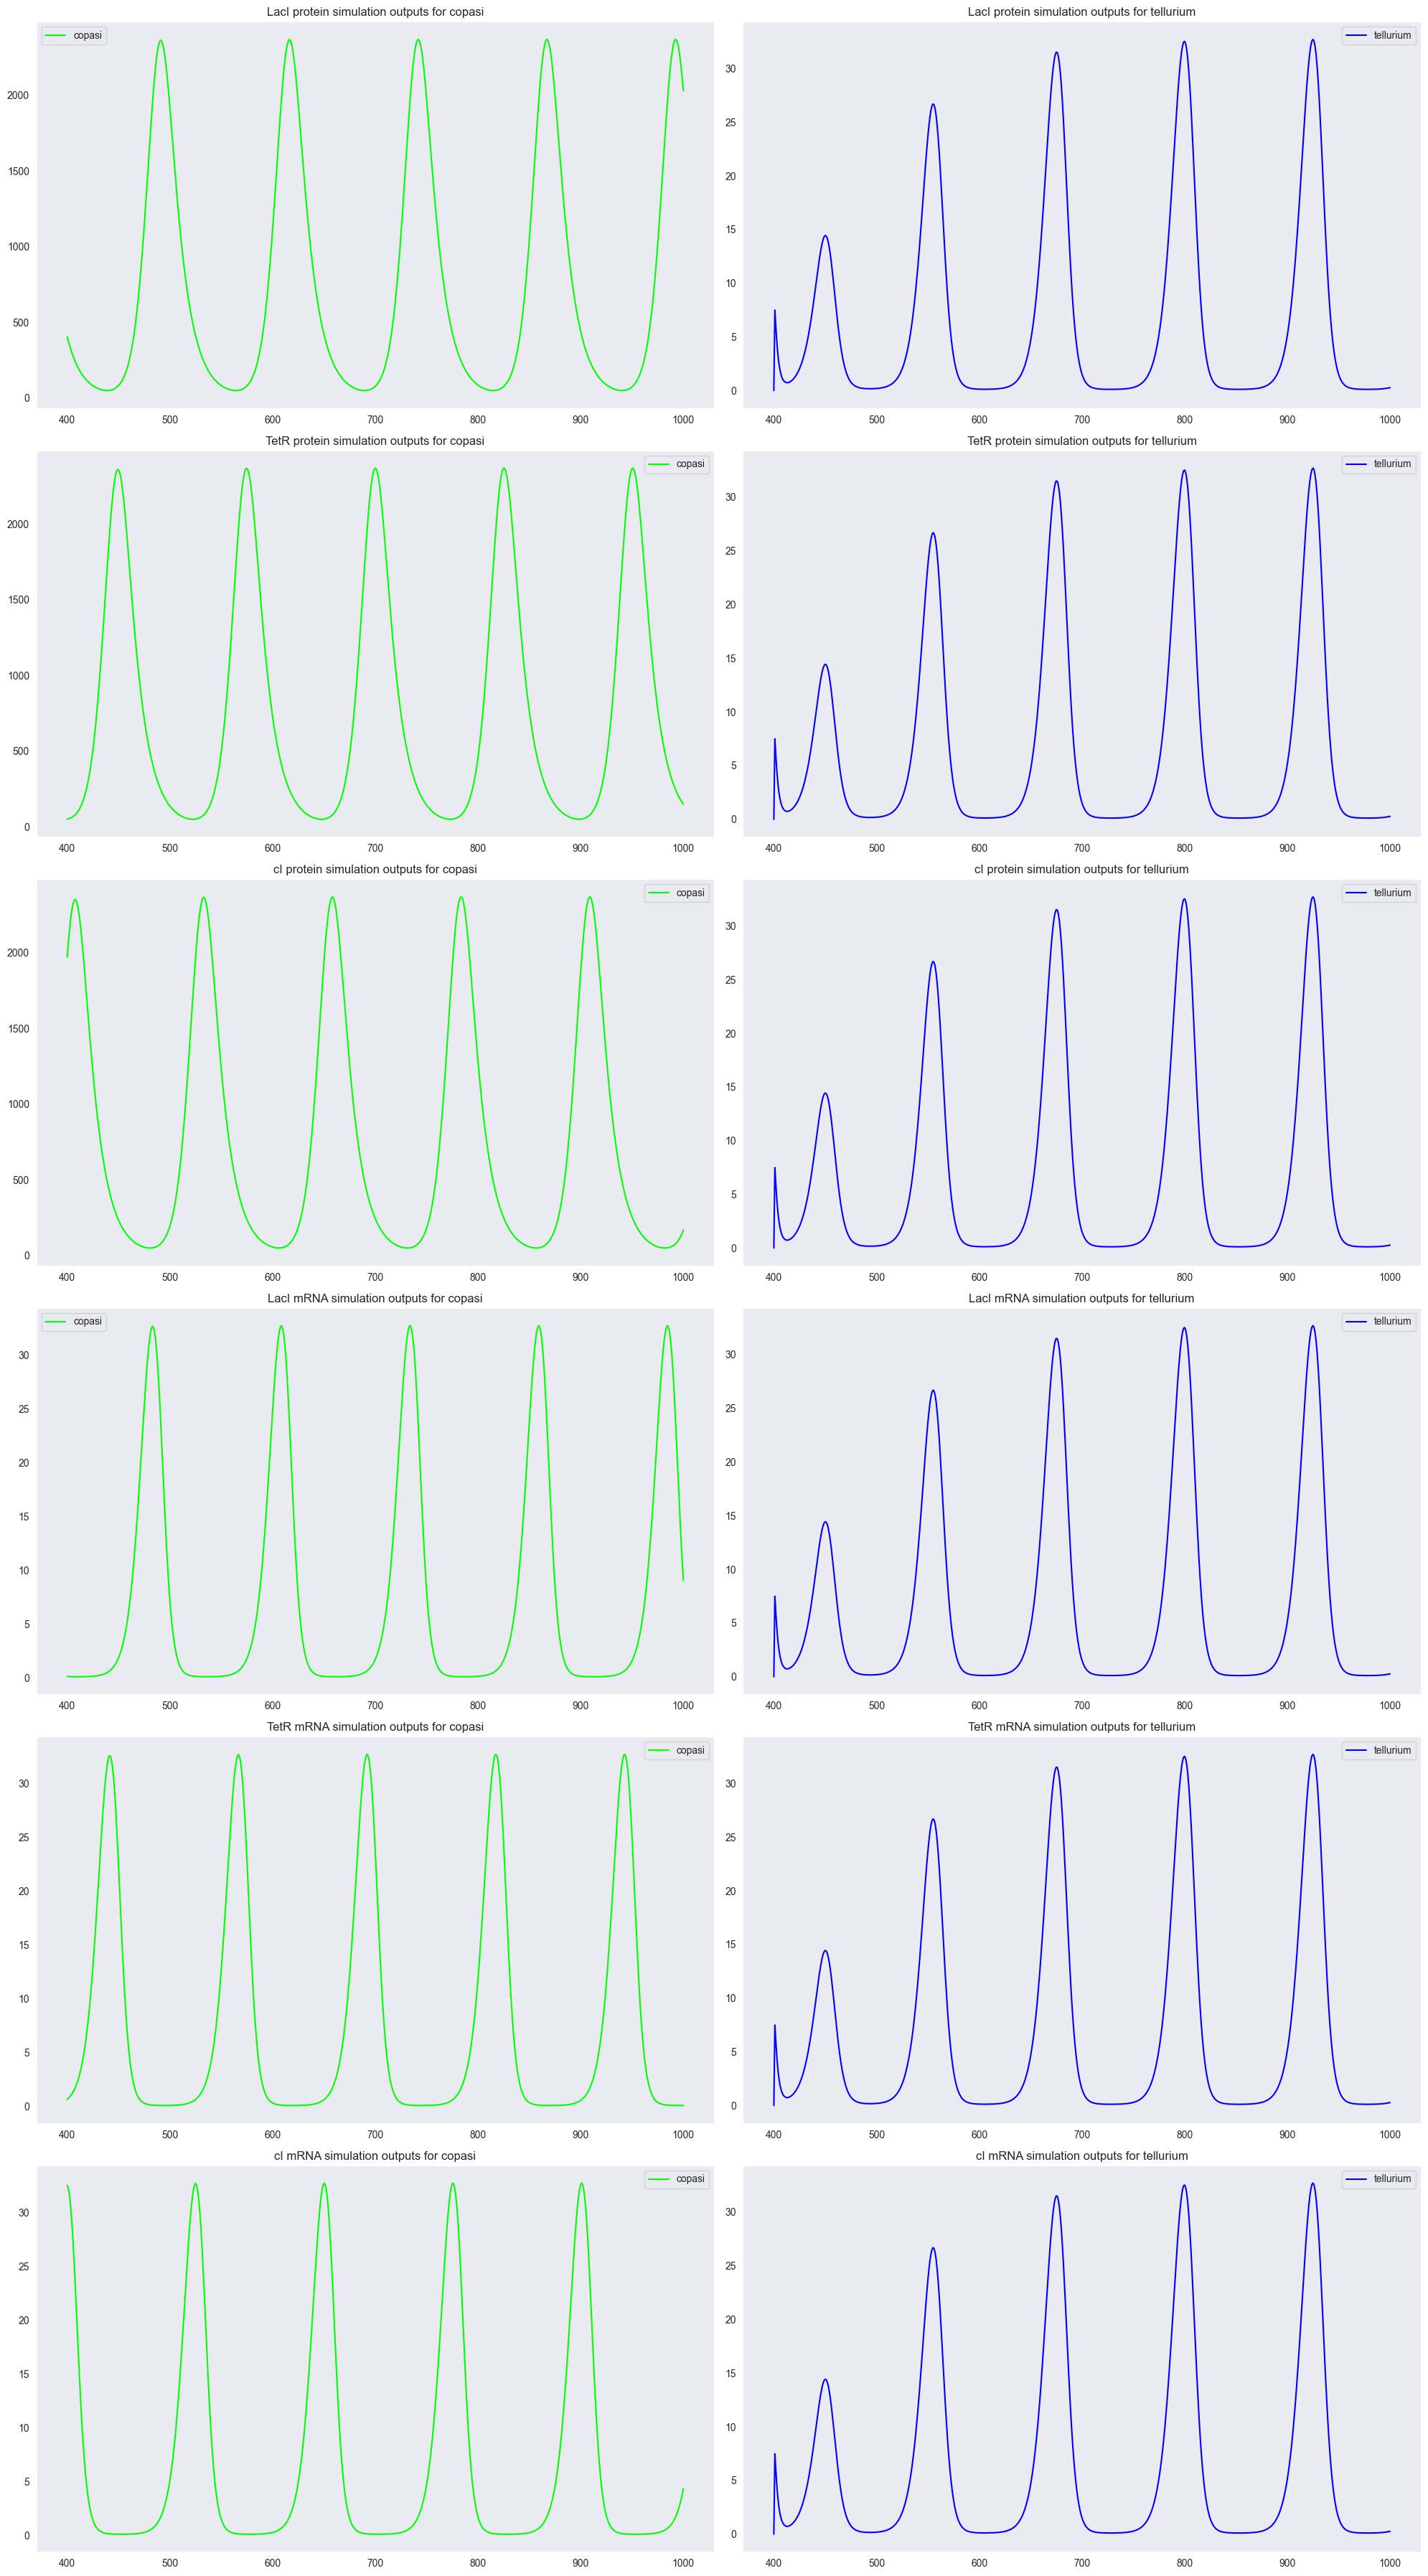

In [13]:
import numpy as np

# verify using default simulator hue
plots = verify.visualize_outputs(data=sbml, simulators=simulators, output_start=start, output_end=end, num_points=nsteps, hue='simulators')

In [6]:
# save the generated plots to a file

plot_path = f"./{test_id}_plot.pdf"
verify.save_plot(plots, plot_path)

In [7]:
!ls ./

bio_check_demo.ipynb
utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8_plot.pdf


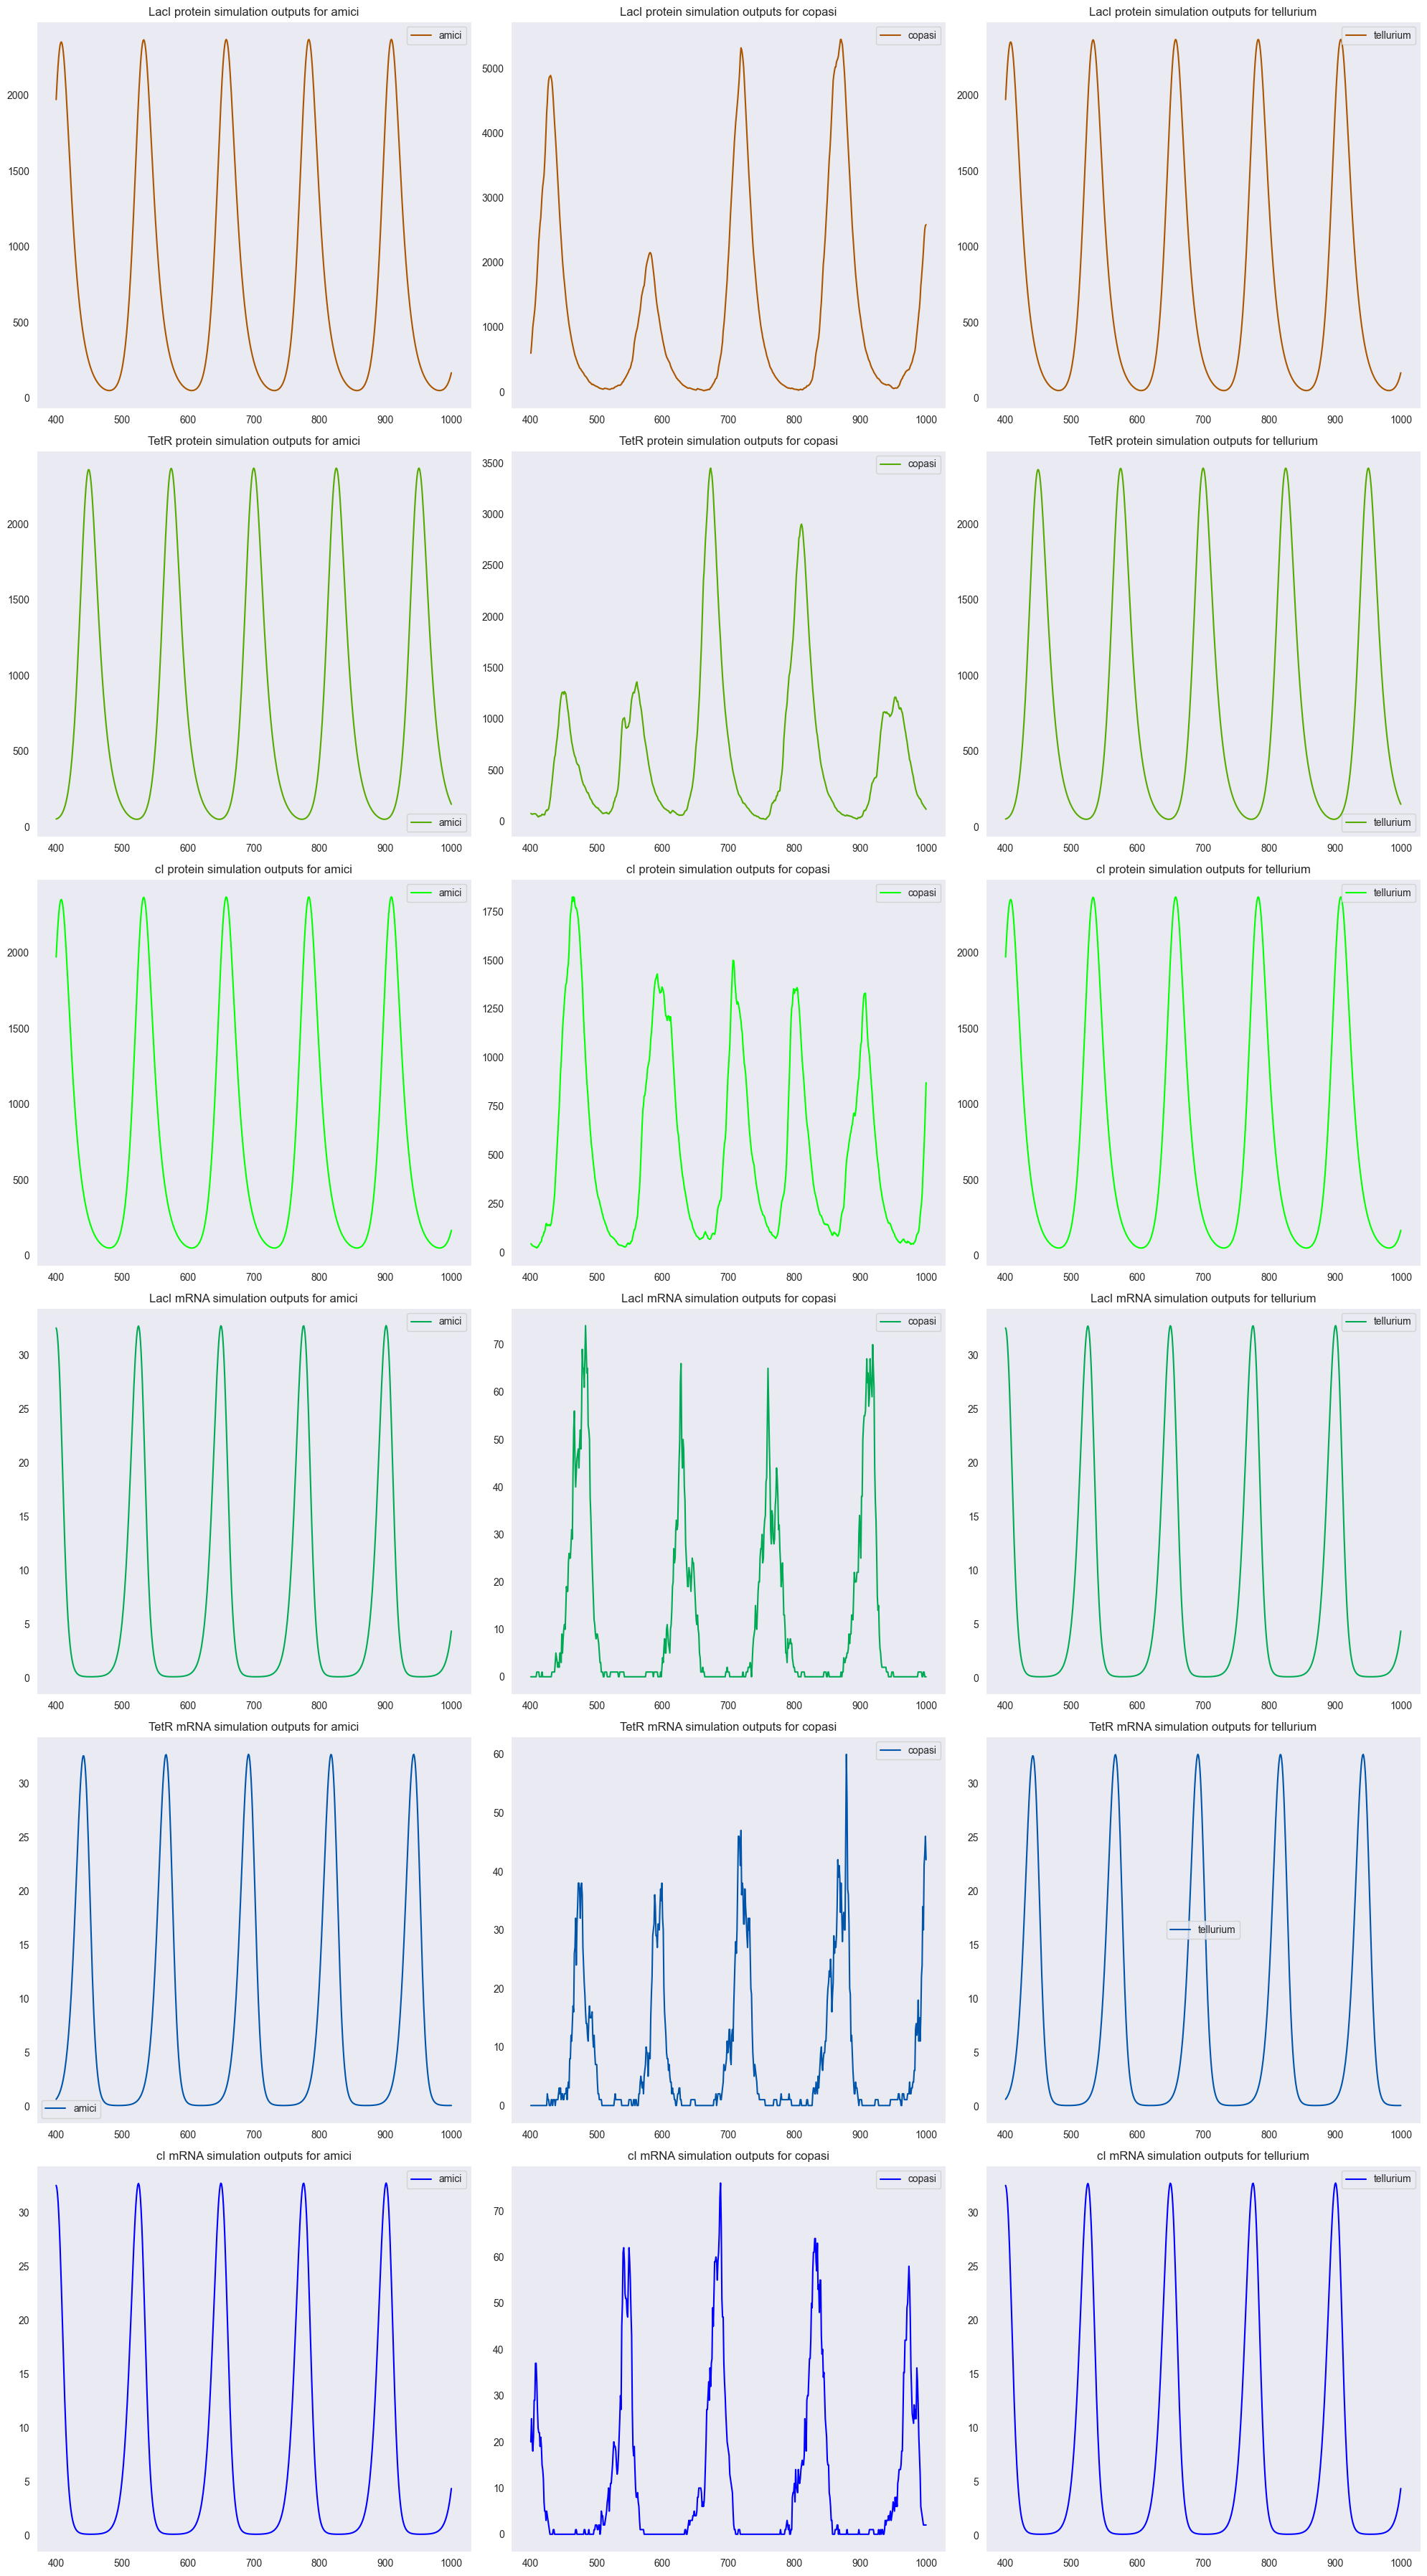

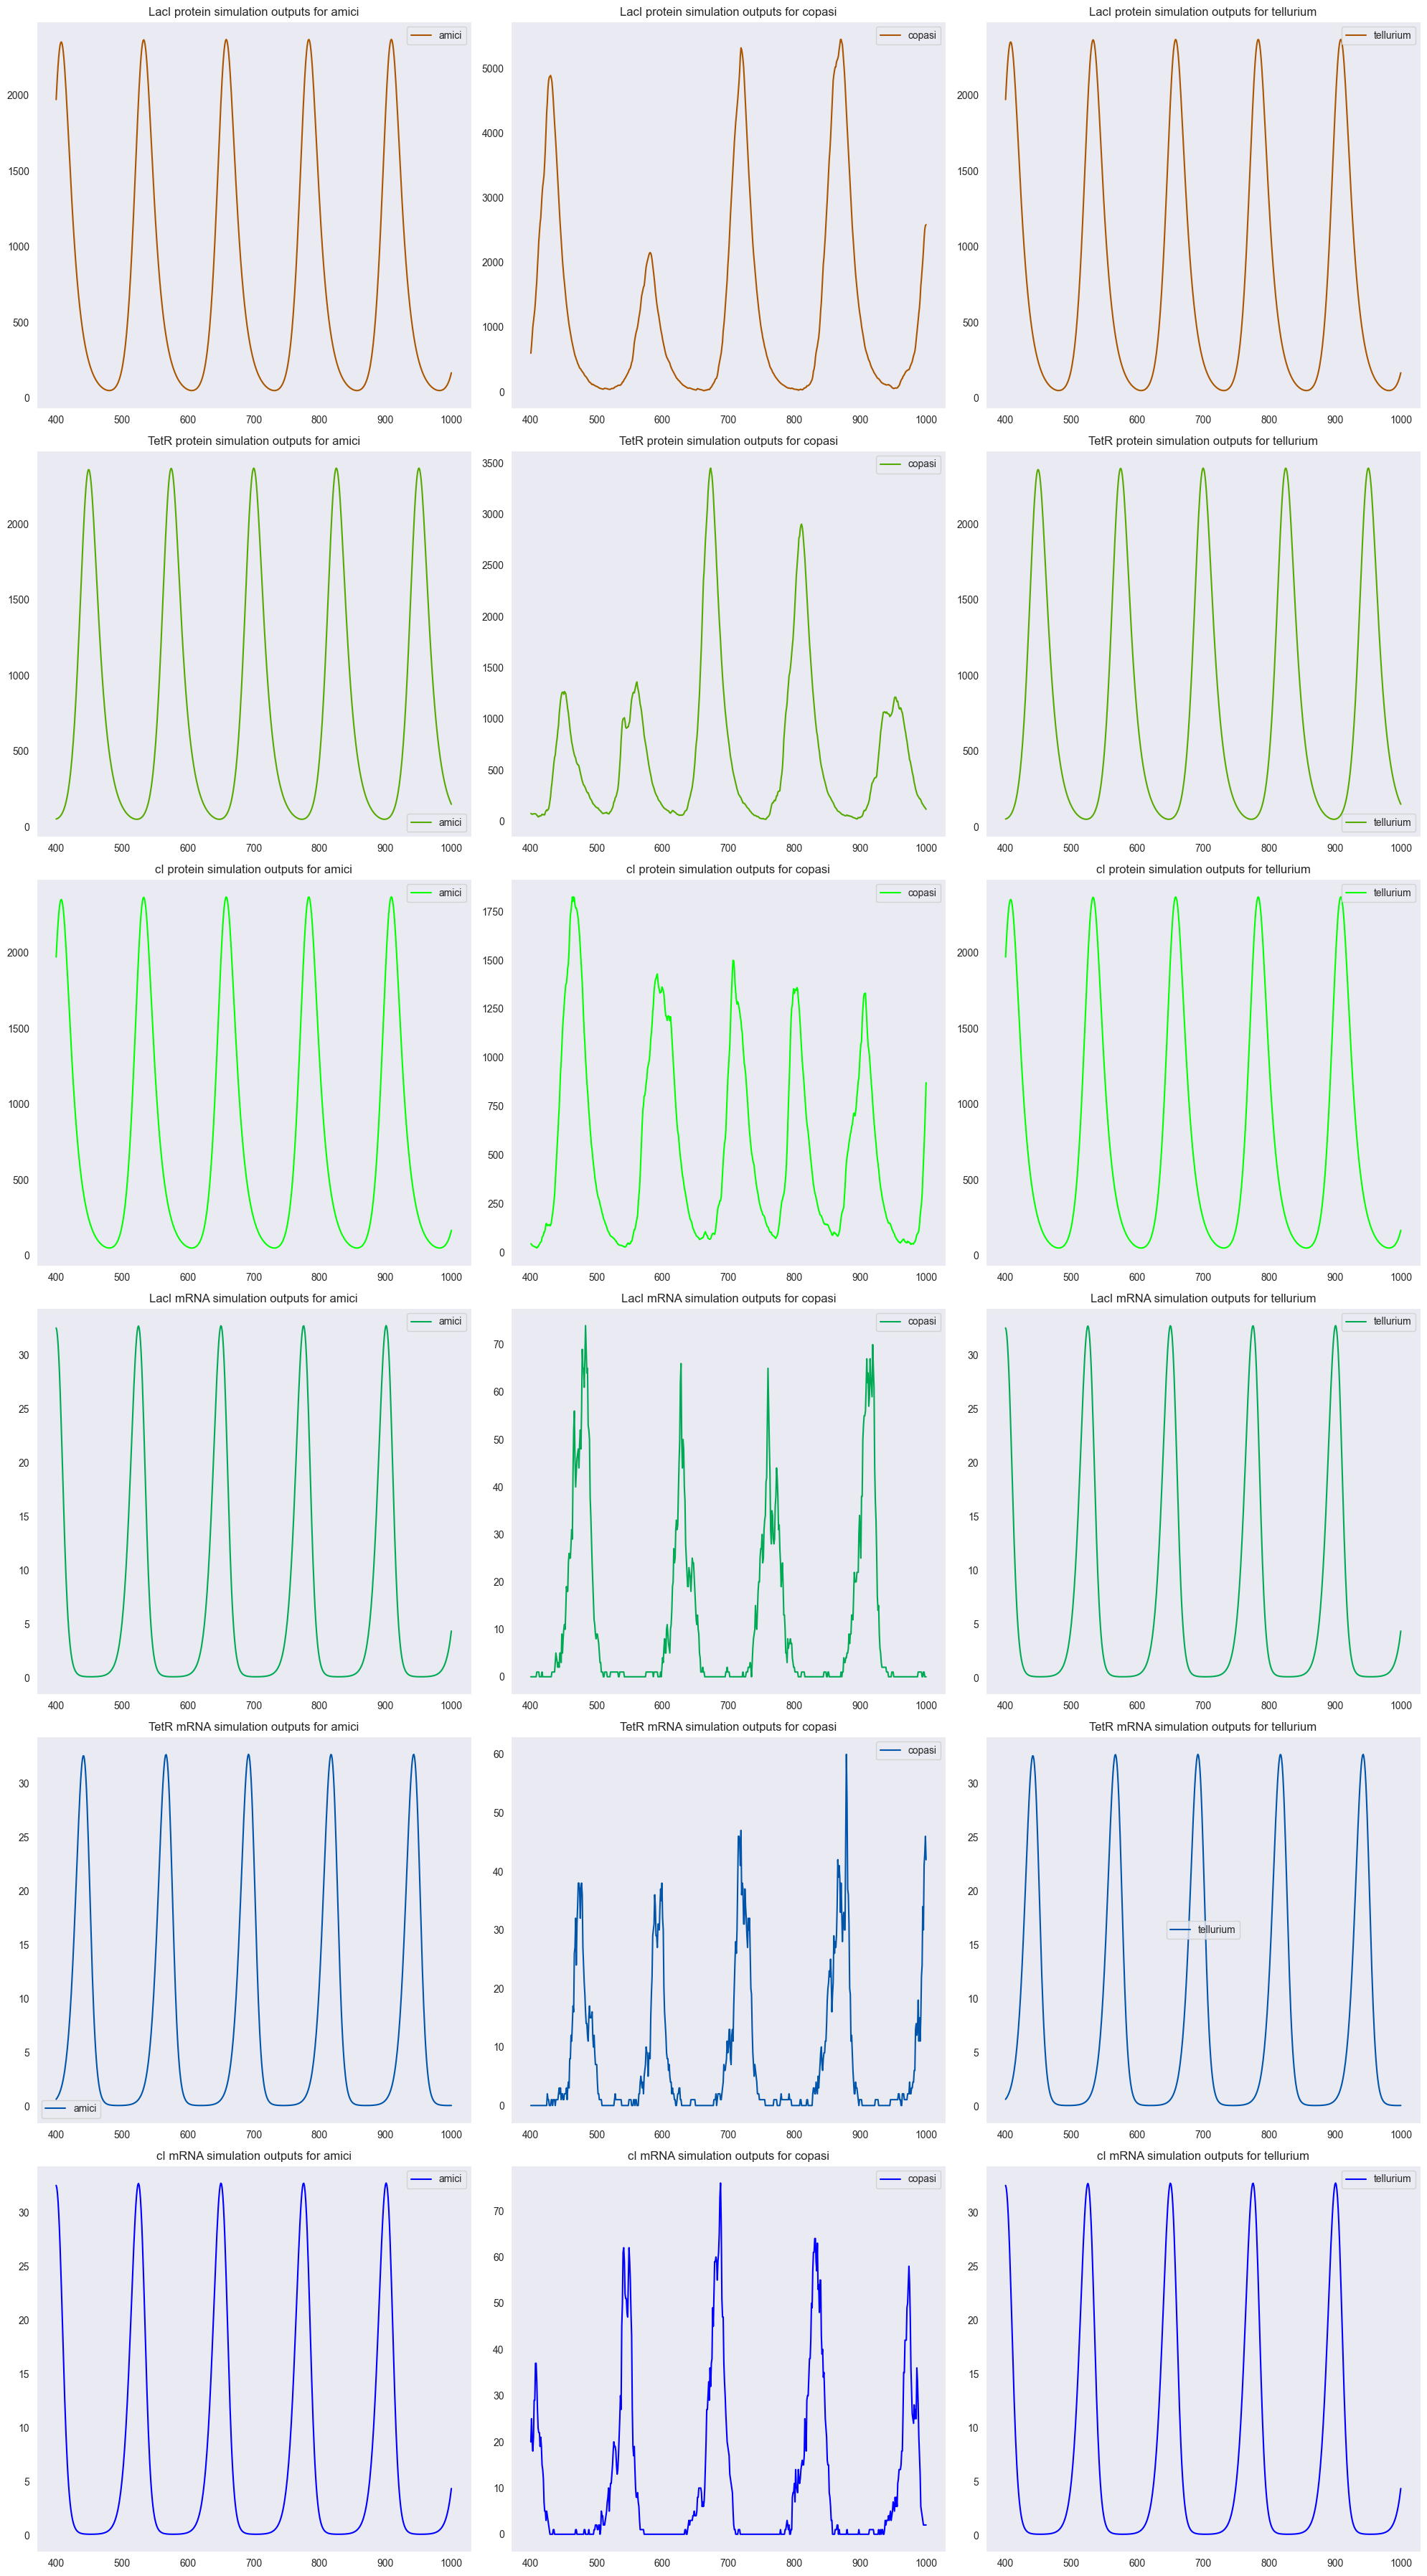

In [8]:
# using the species hue

verify.visualize_outputs(test_data, simulators, output_start=start, output_end=end, num_points=points, hue='species')

In [9]:
simulators

['amici', 'copasi', 'tellurium']

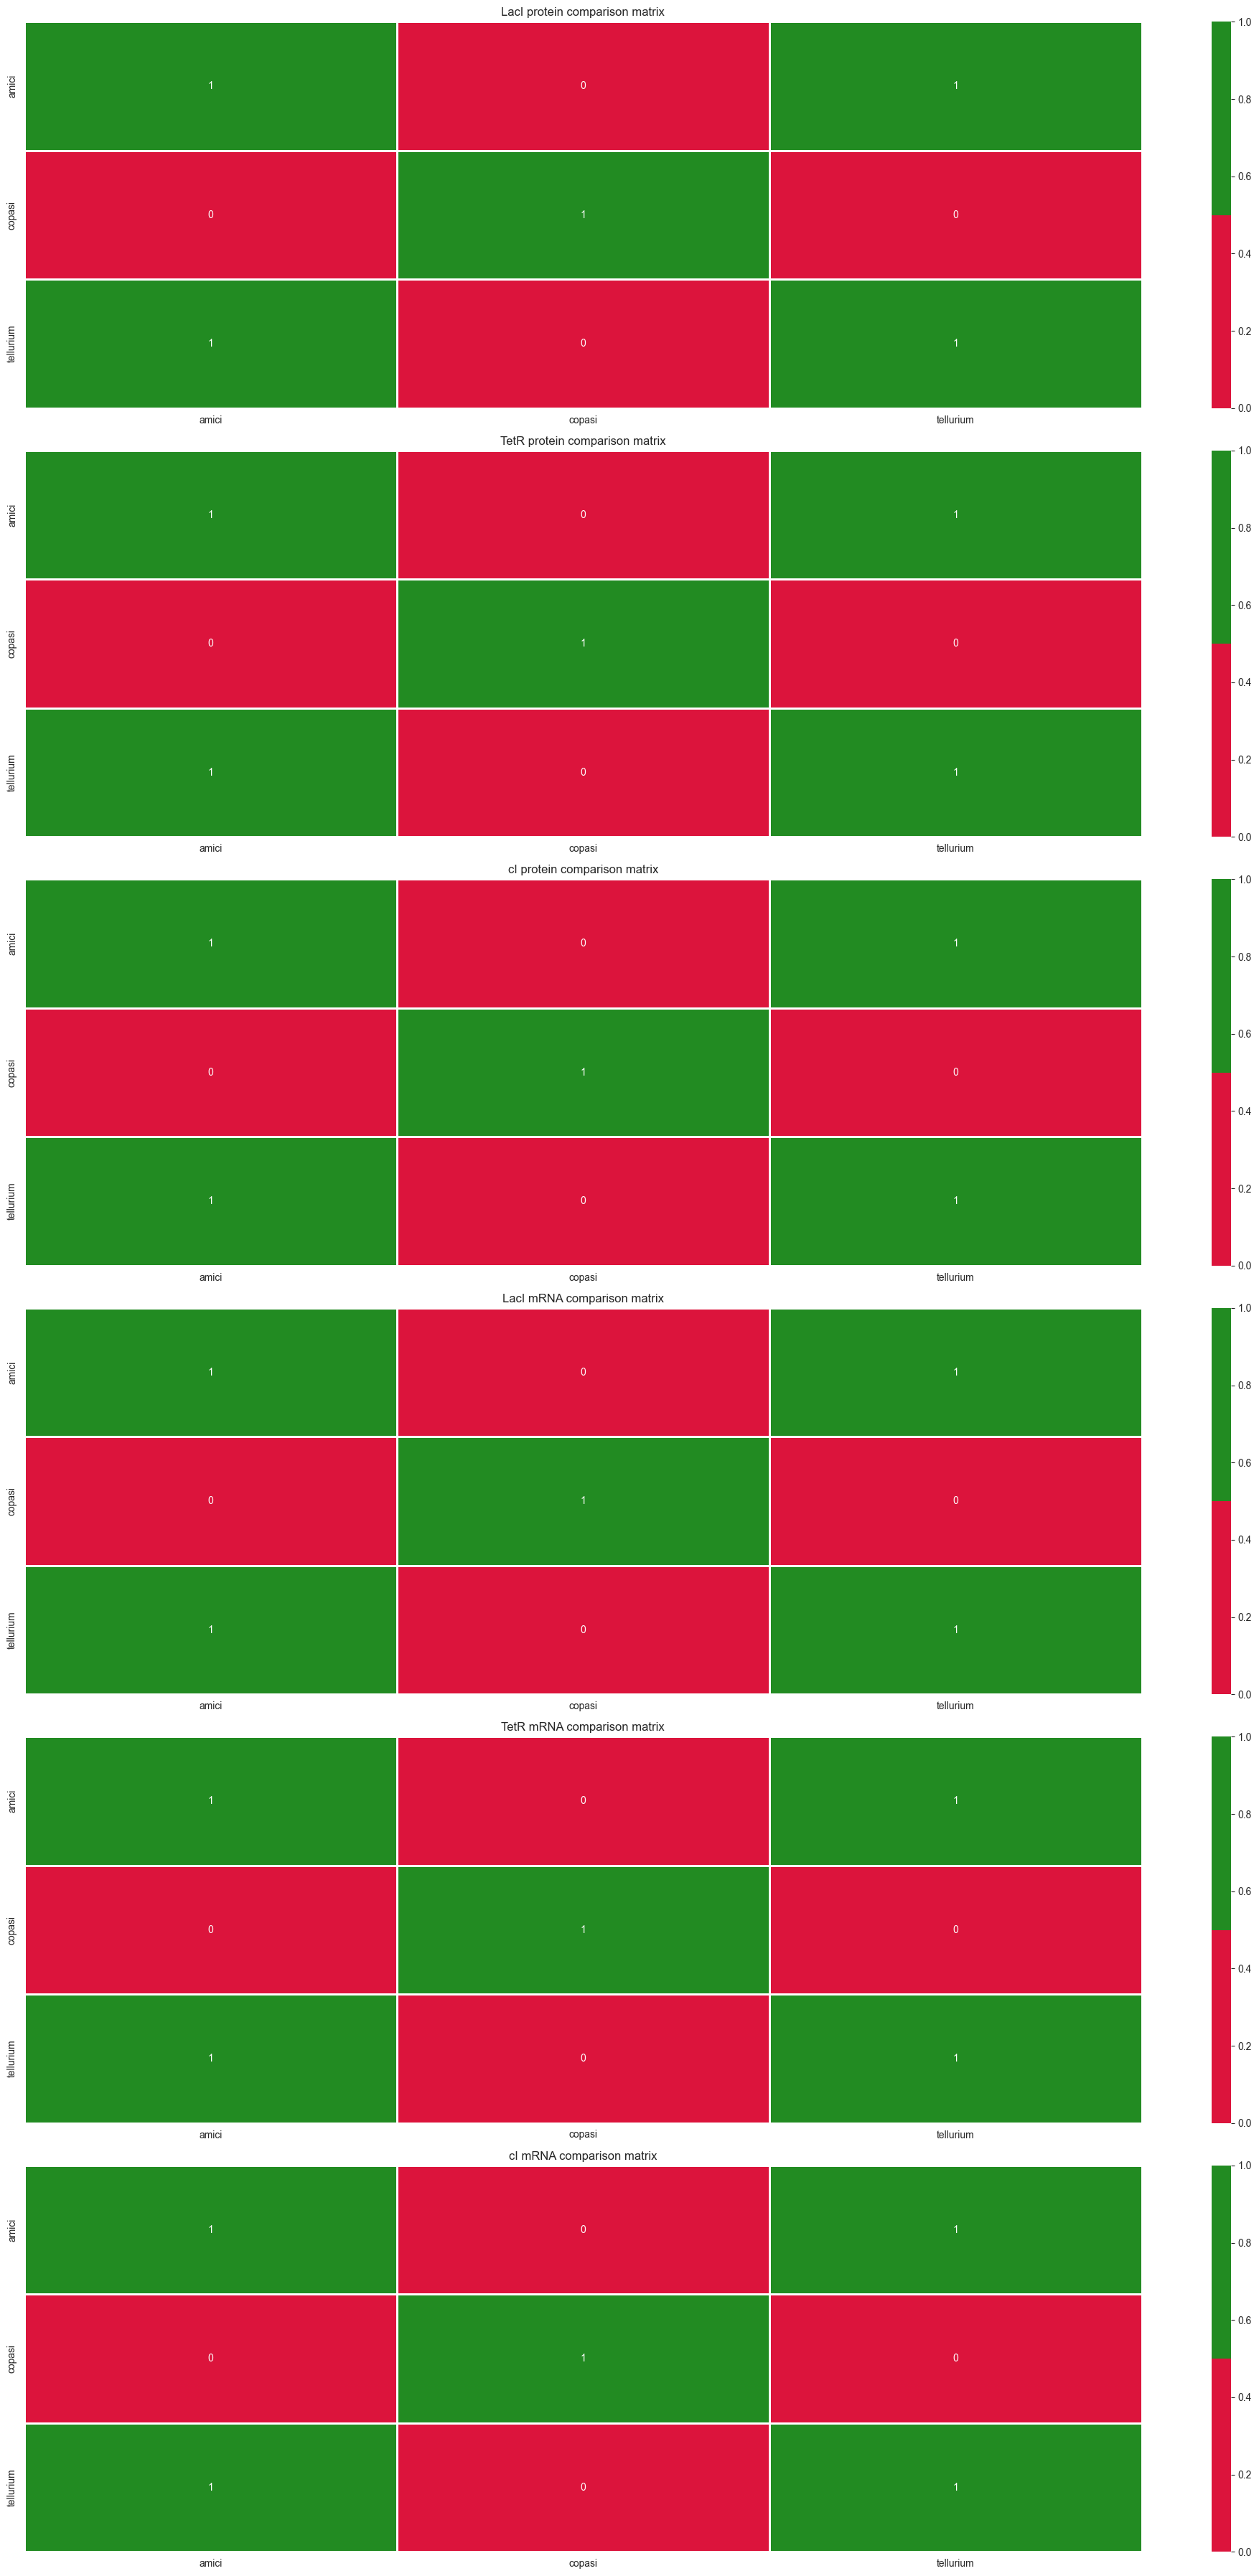

In [7]:
# visualize comparison matrix using the specified comparison type
comparison_plots = verify.visualize_comparison(data=test_data, simulators=simulators, comparison_type='proximity')

In [8]:
# save comparison viz
verify.save_plot(comparison_plots, f"./{test_id}_comparison_plot.pdf")

In [9]:
!ls ./

bio_check_demo.ipynb
utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8_comparison_plot.pdf
utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8_plot.pdf


In [7]:
# export output data to csv
verify.export_csv(data=test_data, simulators=simulators, save_dest=f"./{test_id}_output_data.csv")

In [8]:
!ls ./

bio_check_demo.ipynb
utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8_comparison_plot.pdf
utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8_output_data.csv
utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8_plot.pdf


In [9]:
verify.observables_dataframe(data=test_data, simulators=simulators)

,LacI protein_amici,LacI protein_copasi,LacI protein_tellurium,TetR protein_amici,TetR protein_copasi,TetR protein_tellurium,cI protein_amici,cI protein_copasi,cI protein_tellurium,LacI mRNA_amici,LacI mRNA_copasi,LacI mRNA_tellurium,TetR mRNA_amici,TetR mRNA_copasi,TetR mRNA_tellurium,cI mRNA_amici,cI mRNA_copasi,cI mRNA_tellurium
0,1971.268573,597.0,1971.265339,51.895554,77.0,51.895323,1971.268573,43.0,1971.265339,32.523911,0.0,32.524067,0.689213,0.0,0.689204,32.523911,20.0,32.524067
1,2056.478843,712.0,2056.474962,53.318600,73.0,53.318418,2056.478843,40.0,2056.474962,32.302486,0.0,32.302603,0.774583,0.0,0.774574,32.302486,25.0,32.302603
2,2133.475001,855.0,2133.472650,55.257774,69.0,55.257563,2133.475001,35.0,2133.472650,31.777324,0.0,31.777481,0.871931,0.0,0.871921,31.777324,20.0,31.777481
3,2200.760995,1006.0,2200.761147,57.764048,70.0,57.763840,2200.760995,32.0,2200.761147,30.946462,0.0,30.946693,0.982860,0.0,0.982849,30.946462,18.0,30.946693
4,2256.962433,1091.0,2256.965006,60.896368,74.0,60.896120,2256.962433,31.0,2256.965006,29.818385,0.0,29.818618,1.109167,0.0,1.109154,29.818385,21.0,29.818618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,109.137255,2184.0,109.129681,193.464301,155.0,193.472947,109.137255,461.0,109.129681,2.679883,1.0,2.679657,0.112850,30.0,0.112851,2.679883,2.0,2.679657
597,120.938334,2366.0,120.929654,181.264906,145.0,181.272977,120.938334,546.0,120.929654,3.030193,1.0,3.029939,0.113085,41.0,0.113086,3.030193,2.0,3.029939
598,134.440854,2507.0,134.430938,169.885196,137.0,169.892728,134.440854,632.0,134.430938,3.424273,0.0,3.423987,0.113661,43.0,0.113661,3.424273,2.0,3.423987
599,149.839122,2570.0,149.827826,159.272577,128.0,159.279604,149.839122,750.0,149.827826,3.866630,0.0,3.866308,0.114584,46.0,0.114584,3.866630,2.0,3.866308


In [10]:
test_sbml_data = verify.get_verify_output(submission_1['job_id'])

KeyError: 'amici'

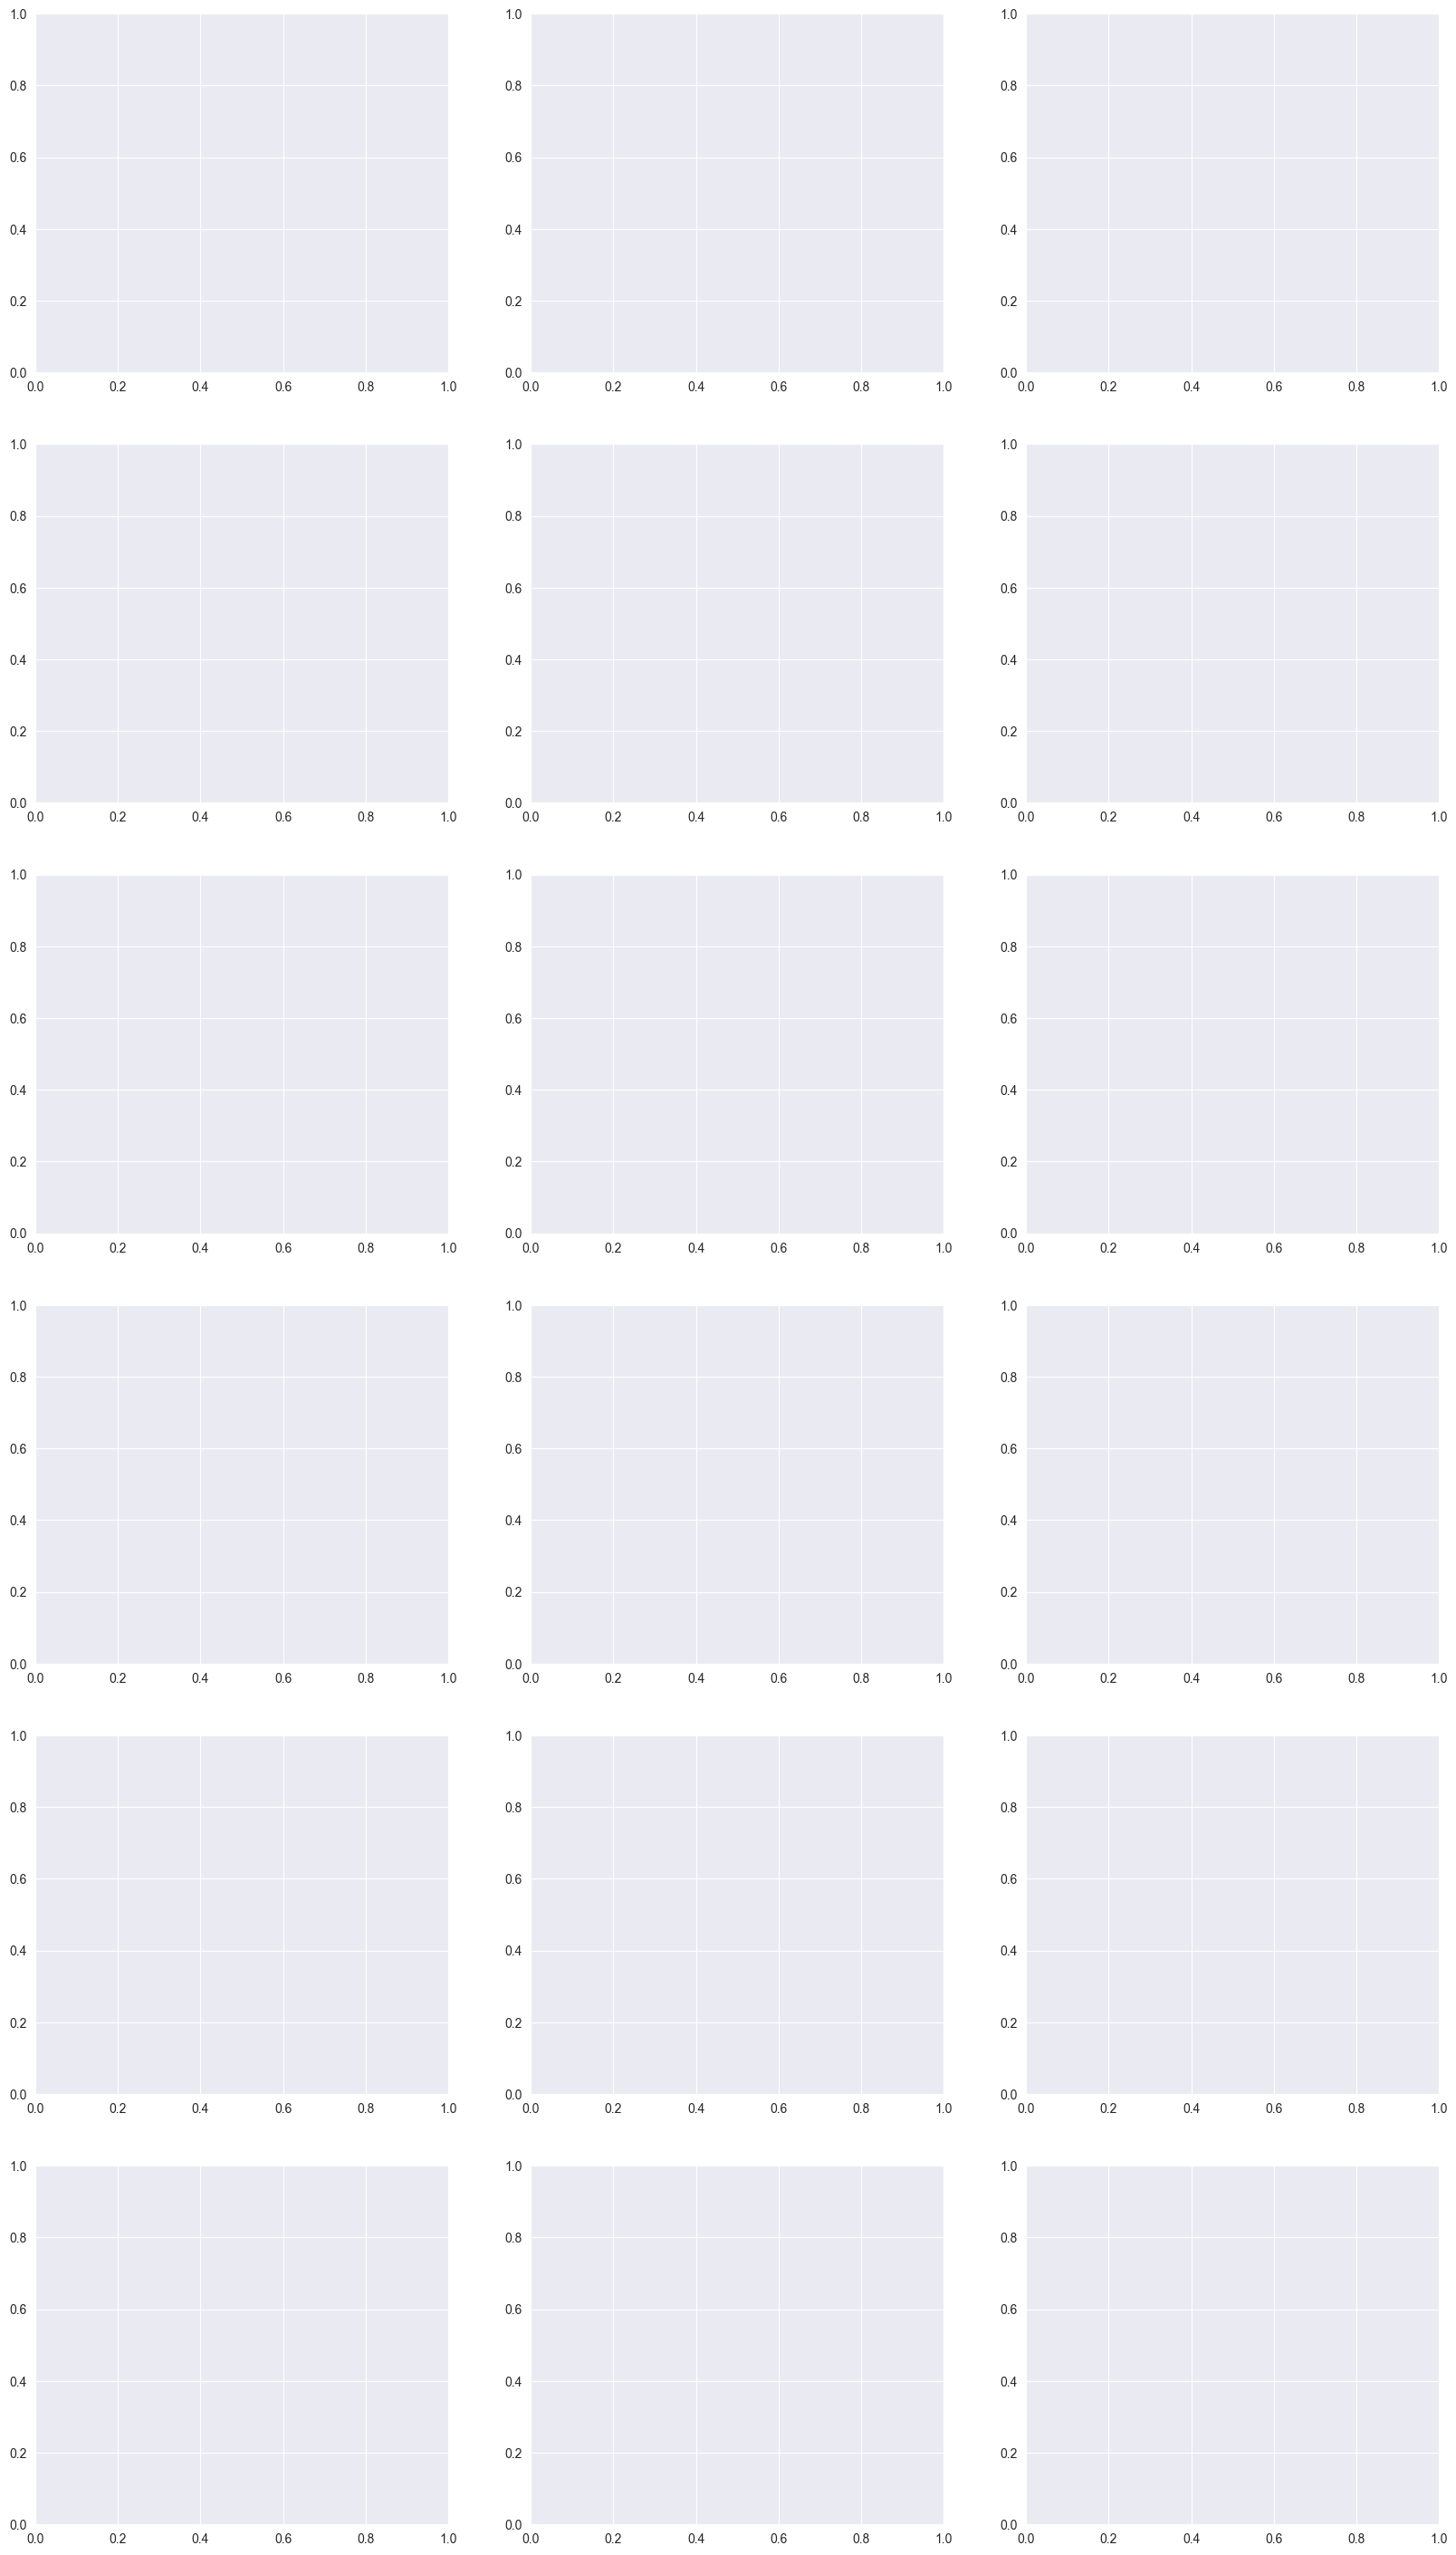

In [11]:
verify.visualize_outputs(data=test_sbml_data, simulators=simulators, output_start=start, output_end=end, num_points=points, hue='simulators')

In [12]:
sbml1 = verify.verify_sbml(sbml_filepath=sbml_fp, comparison_id=comparison_id, end=end, number_of_steps=nsteps, simulators=['copasi', 'tellurium'])

In [13]:
sbml1

{'job_id': 'test_notebook_sbml0_17b1b858-1709-4624-8a47-bc69cbbc1319',
 'status': 'PENDING',
 'timestamp': '2024-08-02 15:47:46.882508',
 'comparison_id': None,
 'path': 'uploads/test_notebook_sbml0_17b1b858-1709-4624-8a47-bc69cbbc1319/BIOMD0000000012_url.xml',
 'end': 10,
 'steps': 100,
 'simulators': ['copasi,tellurium'],
 'include_output': True,
 'rTol': None,
 'aTol': None,
 'selection_list': None}

In [14]:
sbml1_output = verify.get_verify_output(sbml1['job_id'])

In [15]:
sbml1_output

{'content': {'status': 'PENDING',
  'job_id': 'test_notebook_sbml0_17b1b858-1709-4624-8a47-bc69cbbc1319',
  'path': 'uploads/test_notebook_sbml0_17b1b858-1709-4624-8a47-bc69cbbc1319/BIOMD0000000012_url.xml',
  'simulators': ['copasi,tellurium'],
  'timestamp': '2024-08-02 15:47:46.882508',
  'end': 10,
  'steps': 100,
  'include_outputs': True,
  'rTol': None,
  'aTol': None,
  'selection_list': None}}